In [1]:
# Data wrangling
import pandas as pd
import numpy as np
# Data visualisation
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Statistical Libraries
from scipy.stats import skew, kurtosis, chi2_contingency, entropy

# missing values
import missingno as msno

# Machine learning
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Geospatial Data
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)



# Tableau

#import tabpy_client
import math
from collections import Counter
from scipy.stats import entropy

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In C:\Users\Bita\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Bita\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Bita\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Bita\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


## Importing the 2020 CDC BRFSS Survey

In [2]:
# # Link to the dataset: https://drive.google.com/file/d/1oHZd4Ilm6YJ9cc3ncHwNBHk4eGavczlv/view?usp=sharing

# !gdown --id "1oHZd4Ilm6YJ9cc3ncHwNBHk4eGavczlv"

In [3]:
raw_data = pd.read_csv("CDC_BRFSS_Survey_2020.csv/CDC_BRFSS_Survey_2020.csv")

In [4]:
raw_data.head()

,Unnamed: 0,X_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,X_PSU,...,X_RFPSA23,X_CLNSCPY,X_SGMSCPY,X_SGMS10Y,X_RFBLDS4,X_STOLDNA,X_VIRCOLN,X_SBONTIM,X_CRCREC1,X_AIDTST4
0,1,1,1,1042020,1,4,2020,1100,2020000001,2020000001,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,2,1,1,2072020,2,7,2020,1200,2020000002,2020000002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,3,1,1,1232020,1,23,2020,1100,2020000003,2020000003,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,4,1,1,1092020,1,9,2020,1100,2020000004,2020000004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,5,1,1,1042020,1,4,2020,1100,2020000005,2020000005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [5]:
# check for the duplicated rows
raw_data.duplicated(keep=False).sum()

0

In [6]:
col_list = list(raw_data.columns)

In [7]:
raw_data.shape

(401958, 280)

In [8]:
desired_columns = ['X_MENT14D',
                   'CELLSEX',
                   'X_AGEG5YR',
                   'X_BMI5CAT',
                   'ACEDEPRS',
                   'ACEDRINK',
                   'ACEDRUGS',
                   'ACEPRISN',
                   'ACEPUNCH',
                   'ACEHURT1',
                   'ACESWEAR',
                   'ACETOUCH',
                   'ACETTHEM',
                   'ACEHVSEX',
                   'ACEDIVRC',
                   'SLEPTIM1',
                   'PHYSHLTH',
                   'GENHLTH',
                   'EXERANY2',
                   'INCOME2',
                   'EMPLOY1',
                   'X_SMOKER3',
                   'MARIJAN1',
                   'RSNMRJN1',
                   'X_RFBING5',
                   'X_RFDRHV7',
                   'HLTHPLN1',
                   'PERSDOC2',
                   'MEDCOST'
                  ]

In [9]:
# Number of each type of column
raw_data.dtypes.value_counts()

float64    234
int64       46
dtype: int64

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Columns: 280 entries, Unnamed: 0 to X_AIDTST4
dtypes: float64(234), int64(46)
memory usage: 858.7 MB


Although data values are numerical, the nature of them are categorical!

## Investigate the target value 
MENTHLTH : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?

OR  

 _MENT14D Calculated variable for 3 level not good mental health status: 0 days, 1-13 days, 14-30 days._MENT14D is derived from MENTHLTH.

1 : Zero days when mental health not good

2: 1-13 days when mental health not good

3: 14+ days when mental health not good

9: Don’t know/ Refused/Missing

We can have two options:

1- working with 'X_MENT14D' as the target with 3 categories (good,fair,poor)

2- working with the calculated feature 'mental_health_status' with 5 categories ('Very good','Good','Fair','Poor','Bad')


In [11]:
# save a copy of data
df = raw_data.copy()

In [12]:
raw_data['MENTHLTH'].unique()

array([30., 88., 10.,  2.,  5., 15.,  8.,  4.,  3., 77., 14., 20.,  1.,
        7., 24.,  9., 25., 28., 99., 16., 12.,  6., 17., 18., 21., 29.,
       nan, 22., 13., 23., 27., 26., 11., 19.])

In [13]:
raw_data["MENTHLTH"] = raw_data["MENTHLTH"].replace(77, np.nan)
raw_data["MENTHLTH"] = raw_data["MENTHLTH"].replace(88, 0)
raw_data["MENTHLTH"] = raw_data["MENTHLTH"].replace(99, np.nan)

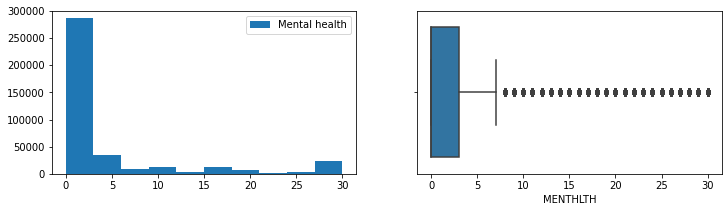

In [14]:
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.hist(raw_data['MENTHLTH'],label = ['Mental health'])
plt.legend()

plt.subplot(122)
sns.boxplot(raw_data['MENTHLTH'])
plt.show()

In [15]:
raw_data['X_MENT14D'].unique()

array([3, 1, 2, 9], dtype=int64)

In [16]:
# transform to categorical data
dic = {1:"Good", 2:"Fair", 3:"Poor", 9: np.nan}
raw_data['X_MENT14D'] = raw_data['X_MENT14D'].replace(dic).astype('category')


In [17]:
raw_data['X_MENT14D'].unique()

[Poor, Good, Fair, NaN]
Categories (3, object): [Poor, Good, Fair]

In [18]:
raw_data['X_MENT14D'].isnull().sum()

7929

Among 401958 applicants, 7929 applicants either didn't know or refused to  answer to this question: "Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?


## Choose your target value:

In [19]:
# option 1
target = 'X_MENT14D'

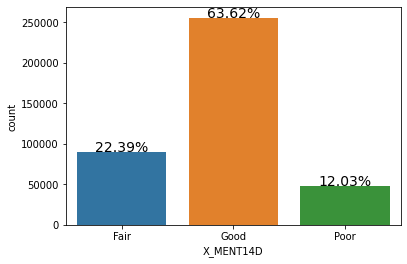

In [20]:
s = sns.countplot(x = target ,data = raw_data)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(raw_data)*100),
            ha="center", fontsize=14) 


Apparently, we are dealing with an imbalanced data set!

### CELLSEX : Are you male or female?

1: Male & 2: Female

In [21]:
dic_sex = {1: "Male" , 
           2: "Female"}
raw_data['CELLSEX'] = raw_data['CELLSEX'].replace(dic_sex).astype('category')

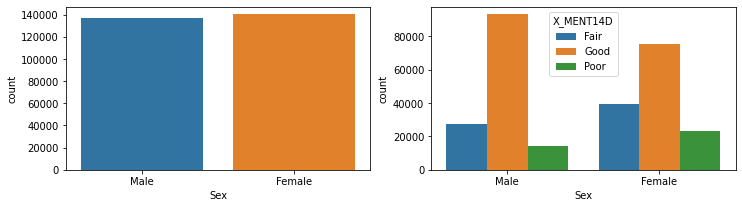

In [22]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(x = 'CELLSEX', data = raw_data, order = ['Male','Female'])
plt.xlabel('Sex')

plt.subplot(122)
sns.countplot(x = 'CELLSEX', data = raw_data, hue =target, order = ['Male','Female'])
plt.xlabel('Sex')
plt.show()

Men have better mental health!

##  Adverse Childhood Experiences (ACEs) 

In [23]:
ACE_columns = ['ACEDEPRS',
               'ACEDRINK',
               'ACEDRUGS',
               'ACEPRISN',
               'ACEDIVRC',
               'ACEPUNCH',
               'ACEHURT1',
               'ACESWEAR',
               'ACETOUCH',
               'ACETTHEM',
               'ACEHVSEX']

In [24]:
raw_data[ACE_columns].head()

,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX
0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [25]:
raw_data['ACEDEPRS'].unique()

array([ 1., nan,  2.,  9.,  7.])

I am gonna create a dictionary to transform numerical values to categoriacal varibles. For these features, I consider different categories for "Don’t
Know/Not sure" and "Refused"


In [26]:
dic1 = {1: 'Yes',
        2: 'No',
        7: 'Not sure',
        9: np.nan}
for colname in ['ACEDEPRS','ACEDRINK','ACEDRUGS','ACEPRISN']:
    raw_data[colname] = raw_data[colname].replace(dic1).astype('category')

In [27]:
dic2 = {1: 'Never',
        2: 'Once',
        3: 'More than once',
        7: 'Not sure',
        9: np.nan}
for colname in ['ACEPUNCH','ACEHURT1','ACESWEAR','ACETOUCH','ACETTHEM','ACEHVSEX']:
    raw_data[colname] = raw_data[colname].replace(dic2).astype('category')

In [28]:
dic3 = {1: 'Yes',
        2: 'No',
        8: 'Not married',
        7: 'Not sure',
        9: np.nan}
raw_data['ACEDIVRC'] = raw_data['ACEDIVRC'].replace(dic3).astype('category')

Now look at the features after transformation

In [29]:
raw_data[ACE_columns].head()

,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX
0,Yes,Yes,Yes,No,Yes,Never,Never,More than once,More than once,More than once,Once
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,No,No,No,Yes,Never,Never,Never,Never,Never,Never
3,No,No,No,No,No,Never,Never,Never,Never,Never,Never
4,No,No,No,No,No,Never,Never,Never,Never,Never,Never


Now, lets investigate each feature vs. target

1 . ACEDEPRS:  Did you live with anyone who was depressed, mentally ill, or suicidal?


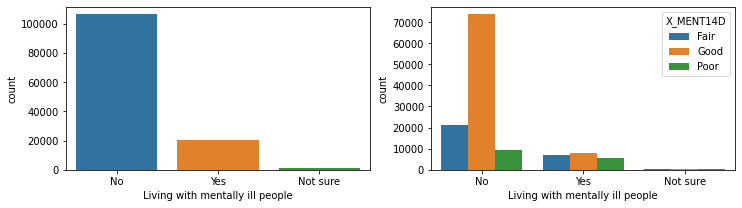

In [30]:
cat_order = ['No','Yes','Not sure']

plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(x = 'ACEDEPRS', data = raw_data,order = cat_order)
plt.xlabel('Living with mentally ill people')

plt.subplot(122)
sns.countplot(x = 'ACEDEPRS', data = raw_data, hue =target,order = cat_order)
plt.xlabel('Living with mentally ill people')
plt.show()

2. ACEDRINK: Did you live with anyone who was a problem drinker
or alcoholic?


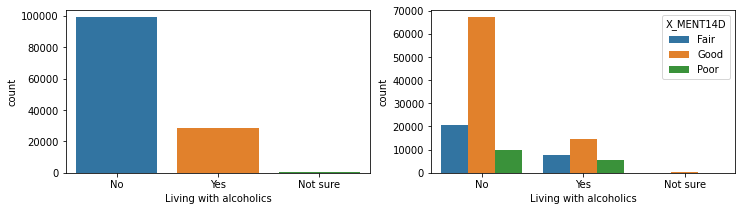

In [31]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(x = 'ACEDRINK', data = raw_data, order = cat_order )
plt.xlabel('Living with alcoholics')

plt.subplot(122)
sns.countplot(x = 'ACEDRINK', data = raw_data, hue = target,order = cat_order )
plt.xlabel('Living with alcoholics')
plt.show()

3. ACEDRUGS: Did you live with anyone who used illegal street drugs or who abused prescription medications?


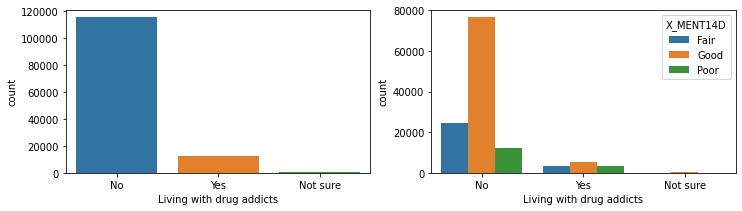

In [32]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(x = 'ACEDRUGS', data = raw_data,order = cat_order )
plt.xlabel('Living with drug addicts')

plt.subplot(122)
sns.countplot(x = 'ACEDRUGS', data = raw_data, hue =target,order = cat_order )
plt.xlabel('Living with drug addicts')
plt.show()

4. ACEPRISN: Did you live with anyone who served time or was sentenced to serve time in a prison, jail, or other correctional facility?


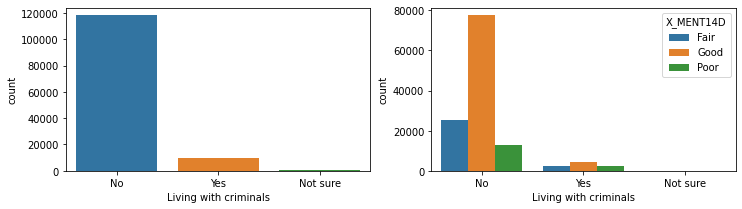

In [33]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(x = 'ACEPRISN', data = raw_data,order = cat_order)
plt.xlabel('Living with criminals')

plt.subplot(122)
sns.countplot(x = 'ACEPRISN', data = raw_data, hue =target,order = cat_order)
plt.xlabel('Living with criminals')
plt.show()

*5*. ACEDIVRC: Were your parents separated or divorced?



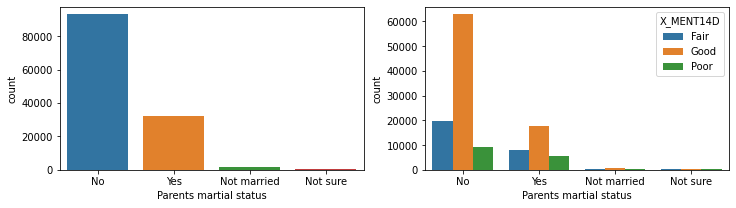

In [34]:
cat_order1 = ['No','Yes','Not married','Not sure']
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(x = 'ACEDIVRC', data = raw_data, order = cat_order1 )
plt.xlabel('Parents martial status')

plt.subplot(122)
sns.countplot(x = 'ACEDIVRC', data = raw_data, hue =target, order = cat_order1 )
plt.xlabel('Parents martial status')
plt.show()

6. ACEPUNCH: How often did your parents or adults in your home ever
slap, hit, kick, punch or beat each other up? Was it...


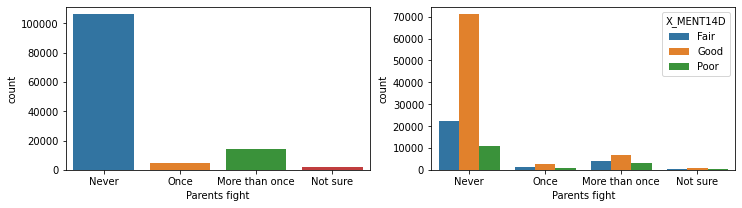

In [35]:
cat_order2 = ['Never','Once','More than once','Not sure']
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(x = 'ACEPUNCH', data = raw_data,  order = cat_order2 )
plt.xlabel('Parents fight')

plt.subplot(122)
sns.countplot(x = 'ACEPUNCH', data = raw_data, hue =target, order = cat_order2 )
plt.xlabel('Parents fight')
plt.show()

7. ACEHURT1: Not including spanking, (before age 18), how often
did a parent or adult in your home ever hit, beat, kick, or
physically hurt you in any way? Was it—


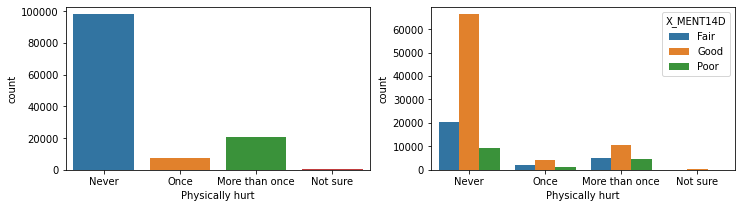

In [36]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(x = 'ACEHURT1', data = raw_data, order = cat_order2 )
plt.xlabel('Physically hurt')

plt.subplot(122)
sns.countplot(x = 'ACEHURT1', data = raw_data, hue =target, order = cat_order2 )
plt.xlabel('Physically hurt')
plt.show()

8. ACESWEAR: How often did a parent or adult in your home ever
swear at you, insult you, or put you down? Was it...


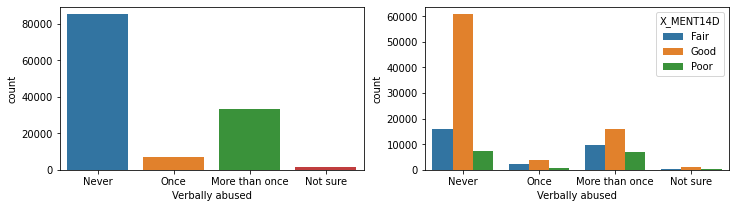

In [37]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(x = 'ACESWEAR', data = raw_data, order = cat_order2 )
plt.xlabel('Verbally abused')

plt.subplot(122)
sns.countplot(x = 'ACESWEAR', data = raw_data, hue =target, order = cat_order2 )
plt.xlabel('Verbally abused')
plt.show()

9. ACETOUCH: How often did anyone at least 5 years older than you
or an adult, ever touch you sexually? Was it...


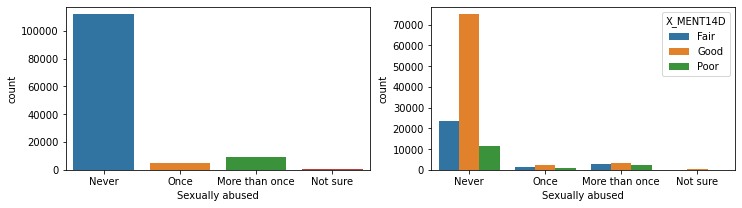

In [38]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(x = 'ACETOUCH', data = raw_data, order = cat_order2 )
plt.xlabel('Sexually abused')

plt.subplot(122)
sns.countplot(x = 'ACETOUCH', data = raw_data, hue =target, order = cat_order2 )
plt.xlabel('Sexually abused')
plt.show()

10. ACETTHEM: How often did anyone at least 5 years older than you
or an adult, try to make you touch them sexually? Was
it...


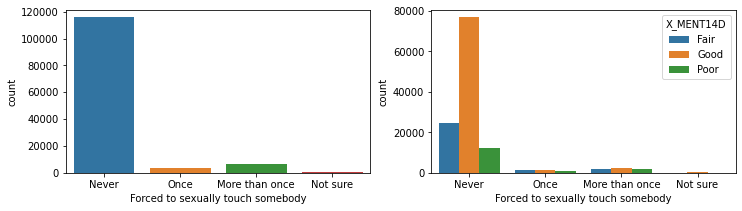

In [39]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(x = 'ACETTHEM', data = raw_data, order = cat_order2 )
plt.xlabel('Forced to sexually touch somebody')

plt.subplot(122)
sns.countplot(x = 'ACETTHEM', data = raw_data, hue =target, order = cat_order2 )
plt.xlabel('Forced to sexually touch somebody')
plt.show()

11. ACEHVSEX: How often did anyone at
least 5 years older than you
or an adult, force you to
have sex? Was it...


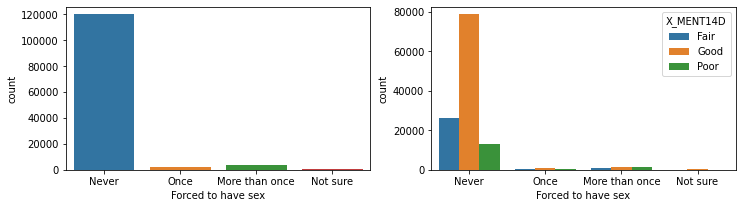

In [40]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(x = 'ACEHVSEX', data = raw_data, order = cat_order2 )
plt.xlabel( 'Forced to have sex')

plt.subplot(122)
sns.countplot(x = 'ACEHVSEX', data = raw_data, hue =target, order = cat_order2 )
plt.xlabel( 'Forced to have sex')
plt.show()

### bivariate analysis

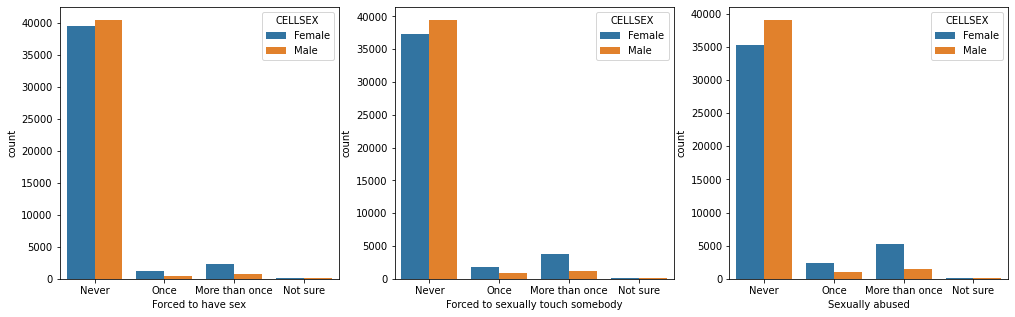

In [41]:
plt.figure(figsize=(17,5))
plt.subplot(131)
sns.countplot(x = 'ACEHVSEX', data = raw_data, hue ='CELLSEX', order = cat_order2)
plt.xlabel( 'Forced to have sex')

plt.subplot(132)
sns.countplot(x = 'ACETTHEM', data = raw_data, hue ='CELLSEX', order = cat_order2 )
plt.xlabel('Forced to sexually touch somebody')

plt.subplot(133)
sns.countplot(x = 'ACETOUCH', data = raw_data, hue ='CELLSEX', order = cat_order2 )
plt.xlabel('Sexually abused')
plt.show()

Women are more likely to be sexually abused during childhood

In [42]:
raw_data.groupby(['CELLSEX', 'ACETOUCH'])[ 'CELLSEX'].count().unstack()

ACETOUCH,More than once,Never,Not sure,Once
CELLSEX,,,,
Female,5210,35206,138,2453
Male,1428,39061,100,1100


#### Perform Chi-squared test:

H0 : mental health status is independent of each of the ACE_columns

$\alpha$ = 0.05

In [43]:
def chi2_test_result(colname, y = target):
  """"
  input: categorical column name
  output: shows if the column is dependent/independent from the target variable  (perform chi squared test)
    """
  alpha = 0.05
  # create contingency table
  chi2, p, dof, ex = chi2_contingency(pd.crosstab(index=raw_data[colname], columns=raw_data[y]))
  if p <= alpha:
    print(colname + ' '+' and mental health status are dependent (reject the null hypothesis)')
  else:
    print(colname + ' '+' and mental health status are independent (fail to reject the null hypothesis')

In [44]:
for colname in ACE_columns:
  chi2_test_result(colname)

ACEDEPRS  and mental health status are dependent (reject the null hypothesis)
ACEDRINK  and mental health status are dependent (reject the null hypothesis)
ACEDRUGS  and mental health status are dependent (reject the null hypothesis)
ACEPRISN  and mental health status are dependent (reject the null hypothesis)
ACEDIVRC  and mental health status are dependent (reject the null hypothesis)
ACEPUNCH  and mental health status are dependent (reject the null hypothesis)
ACEHURT1  and mental health status are dependent (reject the null hypothesis)
ACESWEAR  and mental health status are dependent (reject the null hypothesis)
ACETOUCH  and mental health status are dependent (reject the null hypothesis)
ACETTHEM  and mental health status are dependent (reject the null hypothesis)
ACEHVSEX  and mental health status are dependent (reject the null hypothesis)


## Missing Values


In [45]:
# Function to calculate missing values by column# Funct 
"""
   input: data frame
   output: a table with missing values 
   """
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [46]:
ACE_missing_values = missing_values_table(raw_data[desired_columns])
ACE_missing_values

Your selected dataframe has 29 columns.
There are 25 columns that have missing values.


,Missing Values,% of Total Values
RSNMRJN1,390525,97.2
ACEHVSEX,275997,68.7
ACETOUCH,275917,68.6
ACETTHEM,275879,68.6
ACESWEAR,275430,68.5
ACEHURT1,275376,68.5
ACEPUNCH,275103,68.4
ACEDIVRC,274462,68.3
ACEPRISN,274284,68.2
ACEDRINK,274246,68.2


Almost 68% of data corresponding to the ACEs are missing. Lets visualize the pattern among the missing values!

<AxesSubplot:>

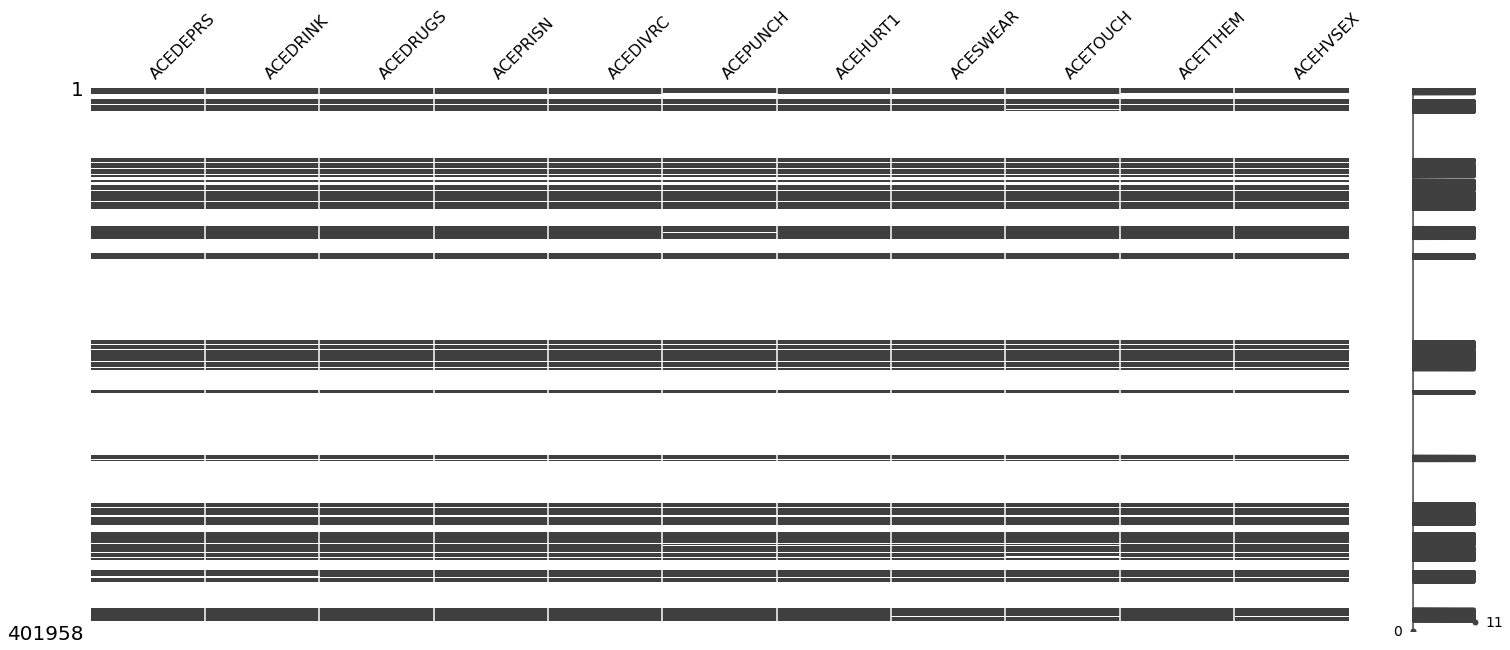

In [47]:
msno.matrix(raw_data[ACE_columns])

<AxesSubplot:>

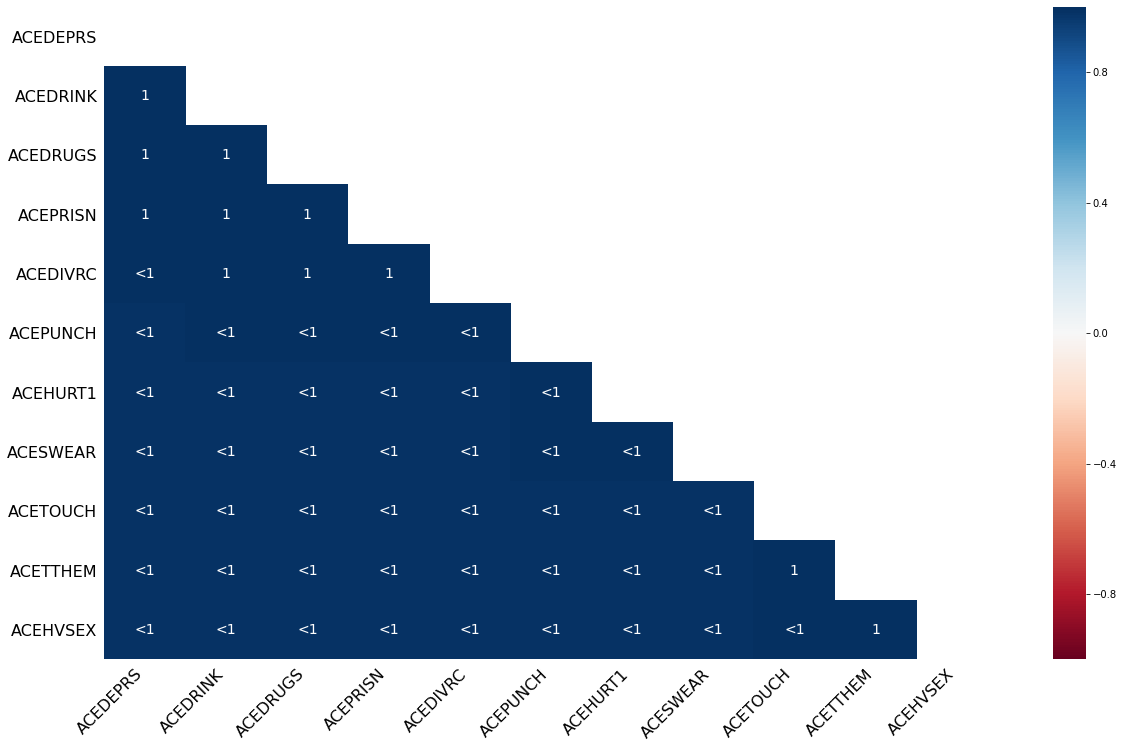

In [48]:
msno.heatmap(raw_data[ACE_columns])

<AxesSubplot:>

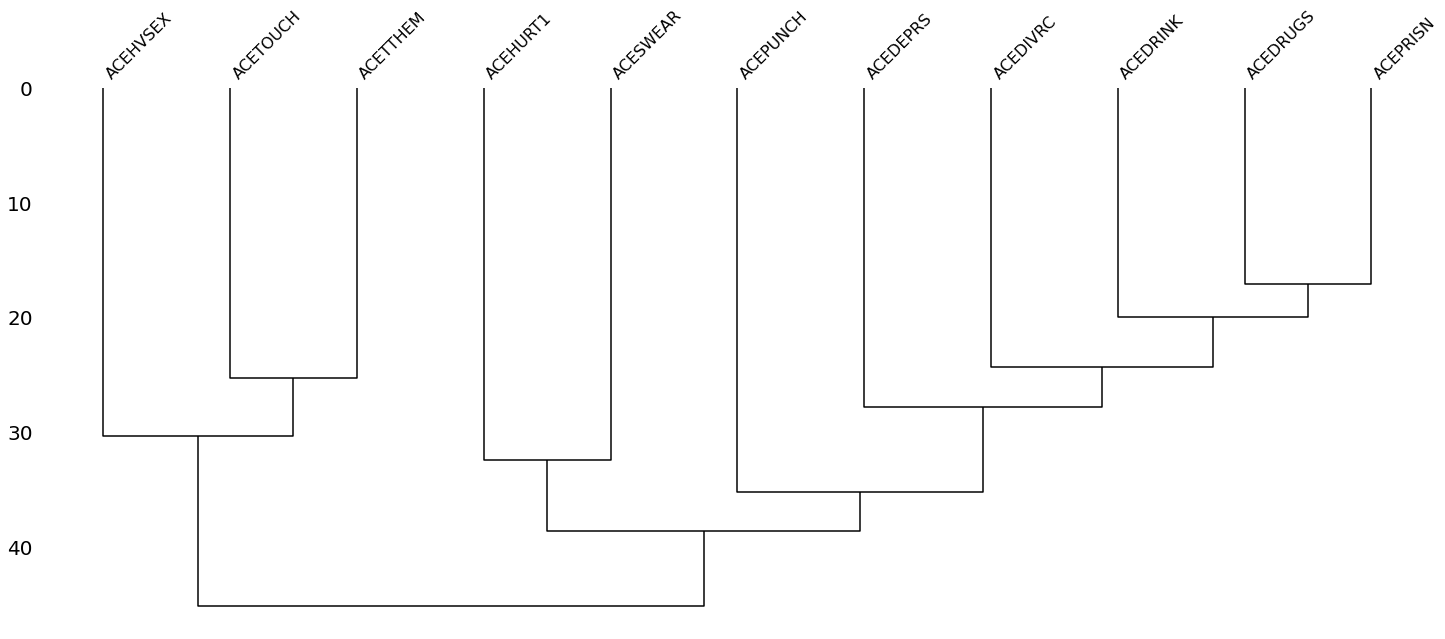

In [49]:
msno.dendrogram(raw_data[ACE_columns])

## Sleep time

* SLEPTIM1:
Number of hours [01-24], 
77 Don’t know / Not sure,
99 Refused


SLEPTIM1: On average, how many hours of sleep do you get in a 24-hour period?:



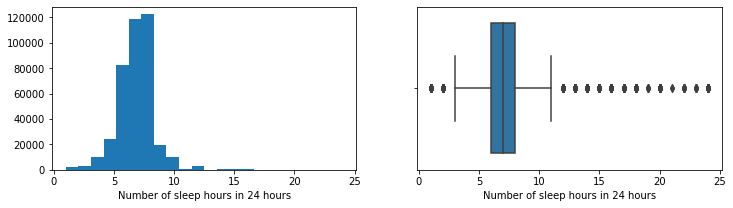

In [50]:
# replace don't know and refused with missing
raw_data['SLEPTIM1'] = raw_data['SLEPTIM1'].replace(77, np.nan)
raw_data['SLEPTIM1'] = raw_data['SLEPTIM1'].replace(99, np.nan)

plt.figure(figsize=(12,3))
plt.subplot(121)
# plot distribution of valid sleep hours
plt.hist(data=raw_data, x="SLEPTIM1", bins = 22)
plt.xlabel('Number of sleep hours in 24 hours')

plt.subplot(122)
sns.boxplot(raw_data["SLEPTIM1"])
plt.xlabel('Number of sleep hours in 24 hours')
plt.show()

There are some outliers that does not make sense! How can a person sleep 24 hours per day?!

In [51]:
# lets remove the outliers of 'SLEPTIM1'
Q1 = raw_data['SLEPTIM1'].quantile(0.25)
Q3 = raw_data['SLEPTIM1'].quantile(0.75)
IQR = Q3 - Q1

# Upper bound
upper = np.where(raw_data['SLEPTIM1'] > (Q3+1.5*IQR))
# Lower bound
lower = np.where(raw_data['SLEPTIM1'] < (Q1-1.5*IQR))
 
# Removing rows corresponding the SleepPerDay Outliers 
raw_data.drop(upper[0], inplace = True)
raw_data.drop(lower[0], inplace = True)

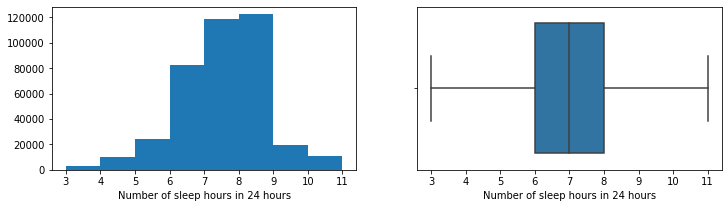

In [52]:
plt.figure(figsize=(12,3))
plt.subplot(121)
# plot distribution of valid sleep hours
plt.hist(data=raw_data, x="SLEPTIM1", bins = 8)
plt.xlabel('Number of sleep hours in 24 hours')

plt.subplot(122)
sns.boxplot(raw_data["SLEPTIM1"])
plt.xlabel('Number of sleep hours in 24 hours')
plt.show()

In [53]:
raw_data['SLEPTIM1'].describe()

count    391174.000000
mean          7.056486
std           1.251629
min           3.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          11.000000
Name: SLEPTIM1, dtype: float64

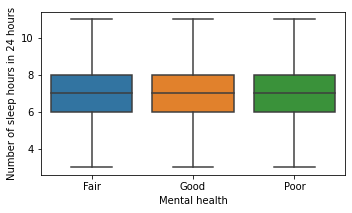

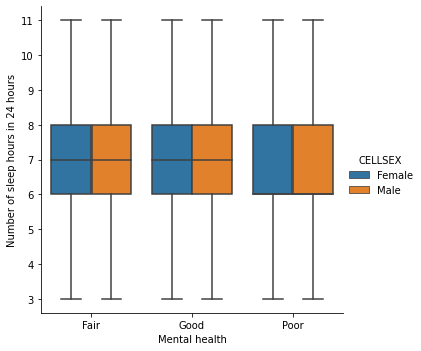

In [54]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.boxplot(y="SLEPTIM1",  x=target, data=raw_data)
plt.xlabel('Mental health')
plt.ylabel('Number of sleep hours in 24 hours')

plt.subplot(121)
sns.catplot(y="SLEPTIM1", hue='CELLSEX', x=target, data=raw_data, kind="box")
plt.xlabel('Mental health')
plt.ylabel('Number of sleep hours in 24 hours')
plt.show()

## Physical health

* PHYSHLTH:
Number of days [01-30],
77 Don’t know/not sure, 
88 None,
99 Refuse

* GENHLTH:
1 Excellent,
2 Very Good,
3 Good,
4 Fair,
5 Poor,
7 Don’t know/Not sure,
9 Refused

* EXERANY2:
1 Yes,
2 No,
7 Don’t know/ Not sure,
9 Refused

In [55]:
PHYSHLTH_columns = ['PHYSHLTH','GENHLTH','EXERANY2']
#raw_data[PHYSHLTH_columns].describe() 

PHYSHLTH: Now thinking about your physical health, for how many days during the past 30 days was your physical health **NOT** good?


count    387420.000000
mean          3.377087
std           7.977675
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: PHYSHLTH, dtype: float64

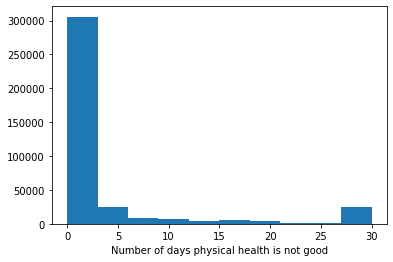

In [58]:
# replace don't know and refused with missing, replace none with 0 
raw_data["PHYSHLTH"] = raw_data["PHYSHLTH"].replace(77, np.nan)
raw_data["PHYSHLTH"] = raw_data["PHYSHLTH"].replace(88, 0)
raw_data["PHYSHLTH"] = raw_data["PHYSHLTH"].replace(99, np.nan)

plt.hist(data=raw_data, x="PHYSHLTH")
plt.xlabel('Number of days physical health is not good')
plt.show

raw_data['PHYSHLTH'].describe()
# 8,686 values were missing (either not sure or refused)

Text(0.5, 21.70625000000002, 'Mental health')

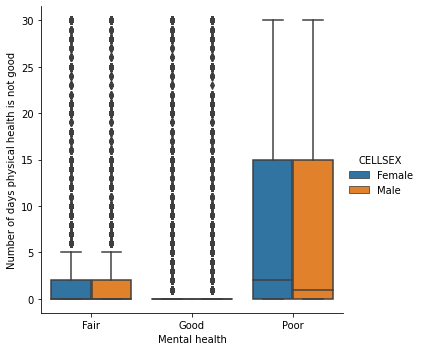

In [59]:
# Boxplot of Physical Health and Mental Health Status
# raw_data.boxplot('PHYSHLTH', by='X_MENT14D')
# sns.boxplot(y="PHYSHLTH", x = "X_MENT14D", hue="X_MENT14D", data=raw_data)
sns.catplot(y="PHYSHLTH", hue='CELLSEX', x=target, data=raw_data, kind="box")
plt.ylabel('Number of days physical health is not good')
plt.xlabel('Mental health')

GENHLTH: Would you say that in general your health is...

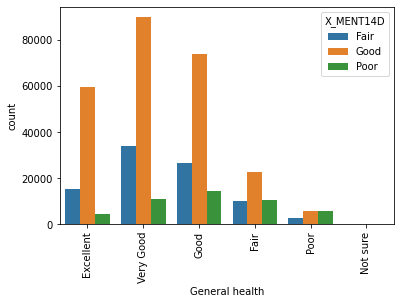

In [60]:
# GENHLTH
dic_GENHLTH = {1: "Excellent",
              2: "Very Good",
              3: "Good",
              4: "Fair",
              5: "Poor",
              7: "Not sure",
              9: np.nan}
raw_data["GENHLTH"] = raw_data["GENHLTH"].replace(dic_GENHLTH).astype("category")

cat_order3 = ['Excellent','Very Good','Good','Fair', 'Poor', 'Not sure']
sns.countplot(x = 'GENHLTH', data = raw_data, hue =target, order = cat_order3)
plt.xlabel('General health')
plt.xticks(rotation=90)
plt.show()

EXERANY2: During the past month, did you participate in any physical activities or exercises?


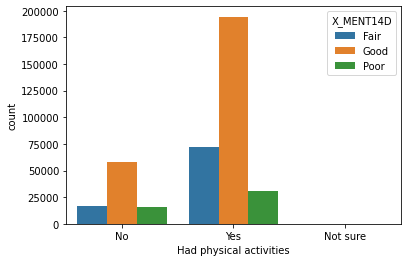

In [61]:
# EXERANY2
dic_EXERANY2 = {1: "Yes",
                2: "No",
                7: "Not sure",
                9: np.nan}

raw_data["EXERANY2"] = raw_data["EXERANY2"].replace(dic_EXERANY2).astype("category")

sns.countplot(x = 'EXERANY2', data = raw_data, hue =target, order = cat_order)
plt.xlabel('Had physical activities')
plt.show()

In [62]:
# Chi squared tests - results not valid for PHYSHLTH bc continuous var
for colname in PHYSHLTH_columns:
    chi2_test_result(colname)

PHYSHLTH  and mental health status are dependent (reject the null hypothesis)
GENHLTH  and mental health status are dependent (reject the null hypothesis)
EXERANY2  and mental health status are dependent (reject the null hypothesis)


## Employment Status and Income Level


* EMPLOY1: Are you currently employed?


1 Employed for wages

2 Self-employed

3 Out of work for 1 year or more

4 Out of work for less than 1 year

5 A Homemaker

6 A Student

7 Retired

8 Unable to work

9 Refused

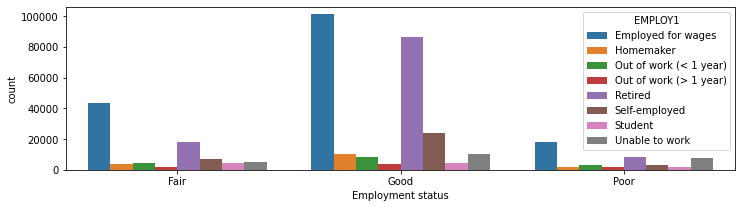

In [63]:

EMPLINC_columns = ['INCOME2', 'EMPLOY1']


#EMPLOY1


dic_EMPLOY1 =  {1: "Employed for wages",
                2: "Self-employed",
                3: "Out of work (> 1 year)",
                4: "Out of work (< 1 year)",
                5: "Homemaker",
                6: "Student",
                7: "Retired",
                8: "Unable to work",
                9: np.nan}


raw_data["EMPLOY1"] = raw_data["EMPLOY1"].replace(dic_EMPLOY1).astype('category')


plt.figure(figsize=(12,3))
ax = sns.countplot(hue = 'EMPLOY1', data = raw_data, x =target)
plt.xlabel('Employment status')
plt.show()

In [65]:
# axes  = pd.crosstab( raw_data['EMPLOY1'],raw_data[target], normalize='index').plot.bar(rot=0, subplots=True, figsize=(20,7), xlabel='Employment status',ylabel='Percentage')
# axes[1].legend(loc=3) 

Retired, Employed for wages and Self_employed have better mental health!

#### Employment status vs. gender

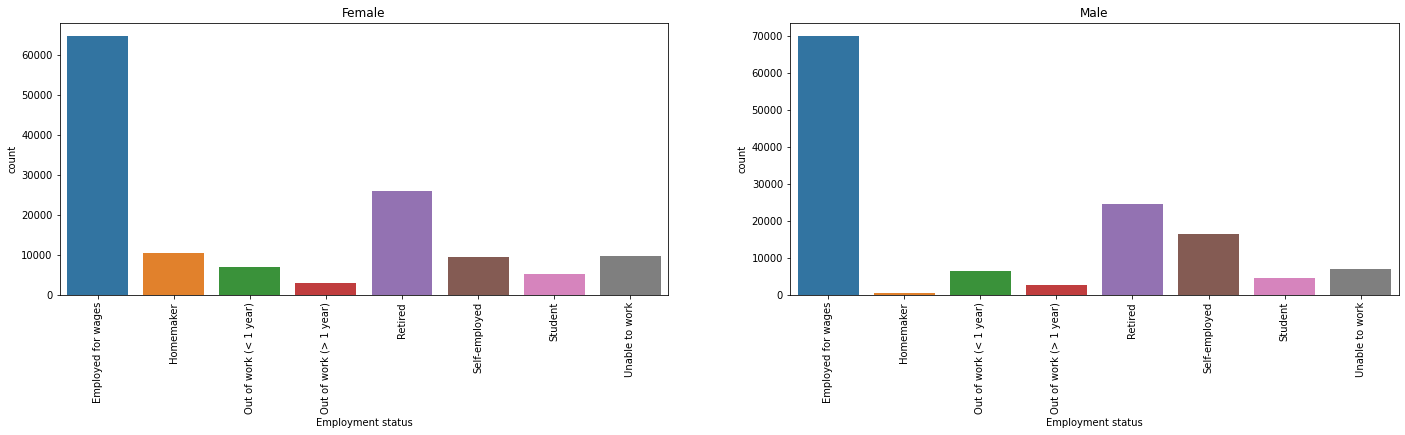

In [66]:
f, axes = plt.subplots(1, 2,figsize=(24, 5))
sns.countplot( x="EMPLOY1", data=raw_data[raw_data['CELLSEX']=='Female'], ax=axes[0])
sns.countplot( x="EMPLOY1", data=raw_data[raw_data['CELLSEX']=='Male'],ax=axes[1])
axes[0].title.set_text('Female')
axes[1].title.set_text('Male')

axes[0].set_xlabel('Employment status')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=90)

axes[1].set_xlabel('Employment status')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=90)


plt.show()

##### Employment status vs. gender vs. mental health

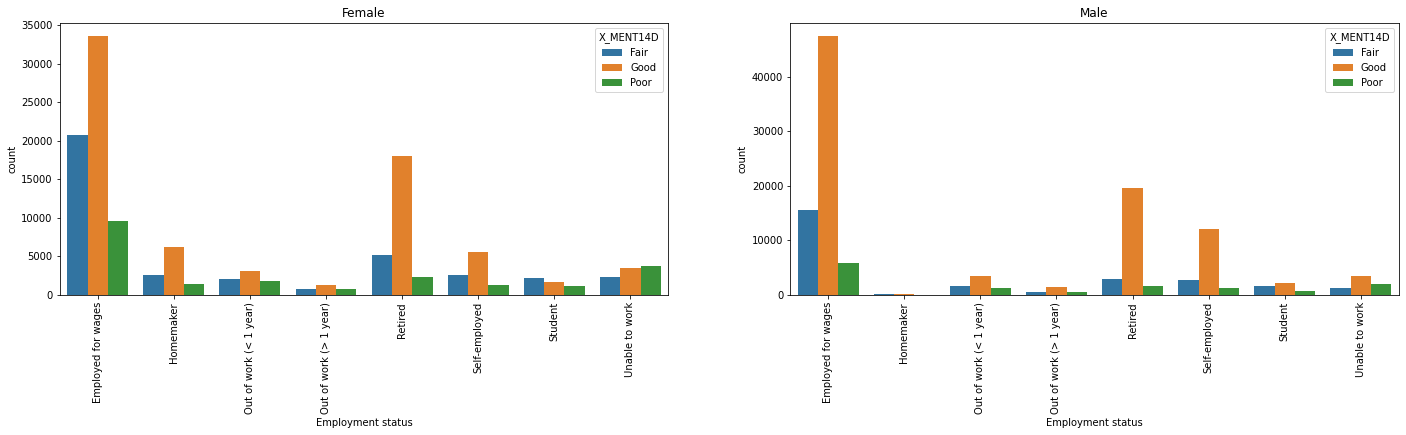

In [67]:
f, axes = plt.subplots(1, 2,figsize=(24, 5))
sns.countplot( x="EMPLOY1", data=raw_data[raw_data['CELLSEX']=='Female'], hue=target, ax=axes[0])
sns.countplot( x="EMPLOY1", data=raw_data[raw_data['CELLSEX']=='Male'], hue=target,ax=axes[1])
axes[0].title.set_text('Female')
axes[1].title.set_text('Male')

axes[0].set_xlabel('Employment status')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=90)

axes[1].set_xlabel('Employment status')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=90)


plt.show()

INCOME2 : Annual income level

1=Less than $10,000 

2=Less than $15,000 ($10,000 to less than $15,000)

 3=Less than $20,000 ($15,000 to less than $20,000) 
 
 4=Less than $25,000 ($20,000 to less than $25,000) 
 
 5=Less than $35,000 ($25,000 to less than $35,000) 
 
 6=Less than $50,000 ($35,000 to less than $50,000) 
 
 7=Less than $75,000 ($50,000 to less than $75,000) 
 
 8=$75,000 or more 
 
 77=Don’t know/Not sure 
 
 99=Refused



In [68]:
income_dic = {1: 'Less than $10k',
              2: '$10k-$15k',
              3: '$15-$20k',
              4: '$20k-$25k',
              5: '$25k-$35k',
              6: '$35k-$50k',
              7: '$50k-$75k',
              8: '$75k or more',
              77: 'Not sure',
              99: np.nan}

raw_data['INCOME2']= raw_data['INCOME2'].replace(income_dic).astype('category')

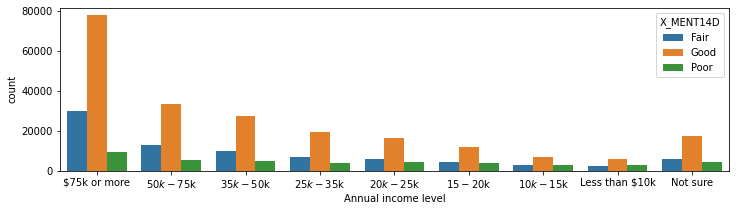

In [91]:
# Histogram of Income and Mental Health Status
plt.figure(figsize=(12,3))
order = ['$75k or more','$50k-$75k','$35k-$50k','$25k-$35k','$20k-$25k','$15-$20k', '$10k-$15k','Less than $10k','Not sure']
sns.countplot( x="INCOME2", data=raw_data, hue=target, order = order)
plt.xlabel('Annual income level')
plt.show()

Obviously mental health is affected by income! The more you make, the better mental helath is

In [70]:
# axes  = pd.crosstab( raw_data['INCOME2'],raw_data[target], normalize='index').plot.bar(rot=0, subplots=True, figsize=(15,5), xlabel='Annual income level',ylabel='Percentage')
# axes[1].legend(loc=3)  

#### Annual income vs. gender

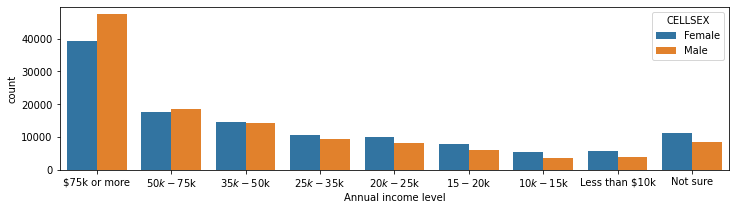

In [90]:
plt.figure(figsize=(12,3))
order = ['$75k or more','$50k-$75k','$35k-$50k','$25k-$35k','$20k-$25k','$15-$20k', '$10k-$15k','Less than $10k','Not sure']
sns.countplot( x="INCOME2", data=raw_data, hue='CELLSEX', order = order)
plt.xlabel('Annual income level')
plt.show()

##### Annual income vs. mental health vs. gender

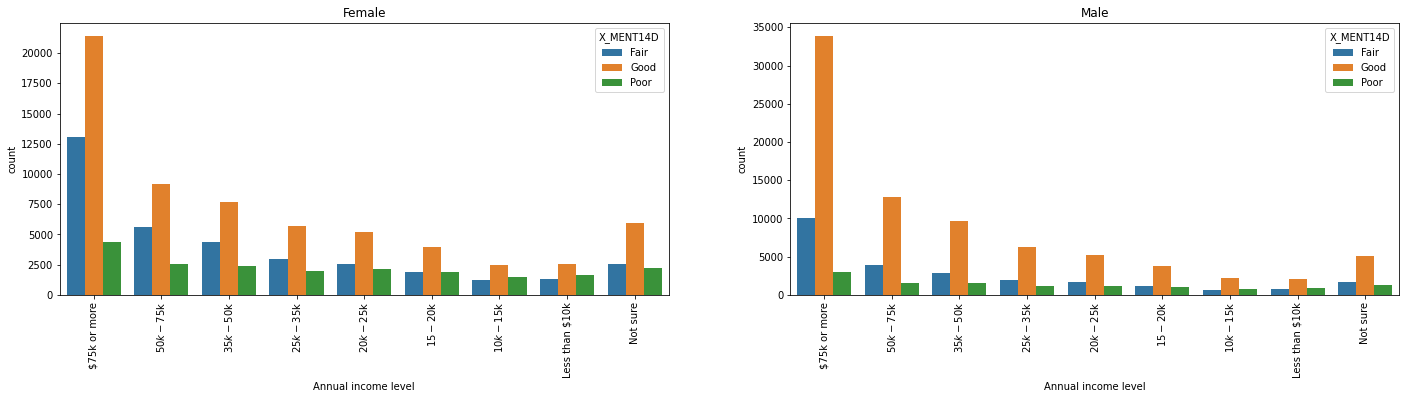

In [72]:
f, axes = plt.subplots(1, 2,figsize=(24, 5))
order = ['$75k or more','$50k-$75k','$35k-$50k','$25k-$35k','$20k-$25k','$15-$20k', '$10k-$15k','Less than $10k','Not sure']
sns.countplot( x="INCOME2", data=raw_data[raw_data['CELLSEX']=='Female'], hue=target, order = order,ax=axes[0])
sns.countplot( x="INCOME2", data=raw_data[raw_data['CELLSEX']=='Male'], hue=target, order = order,ax=axes[1])
axes[0].title.set_text('Female')
axes[1].title.set_text('Male')

axes[0].set_xlabel('Annual income level')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=90)

axes[1].set_xlabel('Annual income level')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=90)

plt.show()

In [73]:
#raw_data.groupby(['CELLSEX','EMPLOY1','INCOME2'])['CELLSEX'].count().unstack()

##### Annual income vs. Employment status

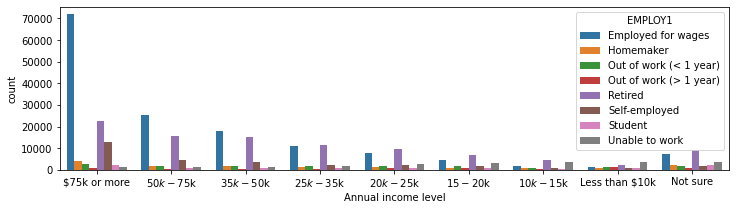

In [89]:
plt.figure(figsize=(12,3))
order = ['$75k or more','$50k-$75k','$35k-$50k','$25k-$35k','$20k-$25k','$15-$20k', '$10k-$15k','Less than $10k','Not sure']
sns.countplot( x="INCOME2", data=raw_data, hue='EMPLOY1', order = order)
plt.xlabel('Annual income level')
plt.show()

##  Accessibility to Healthcare.
HLTHPLN1 : Do you have any kind of healthcare coverage, including health insurance, prepaid plans such as HMOs, or government plans such as medicare or indian health service?

PERSDOC2 : Do you have one person you think of as your personal doctor or health care provider?



In [75]:
# Healthcare_access = raw_data[['HLTHPLN1', 'PERSDOC2']]

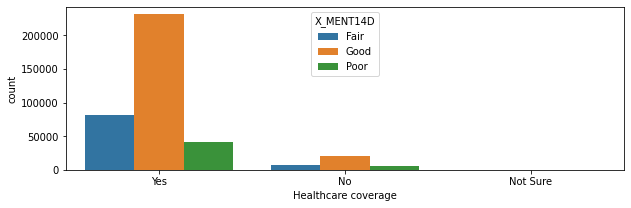

In [88]:
dic_healthcare =  {1: "Yes",
                   2: "No",
                   7: "Not Sure ",
                   9: np.nan}


raw_data["HLTHPLN1"] = raw_data["HLTHPLN1"].replace(dic_healthcare).astype('category')


plt.figure(figsize=(10,3))
sns.countplot(x = 'HLTHPLN1', data = raw_data, hue=target, order = ['Yes','No','Not Sure'])
plt.xlabel('Healthcare coverage')
plt.show()

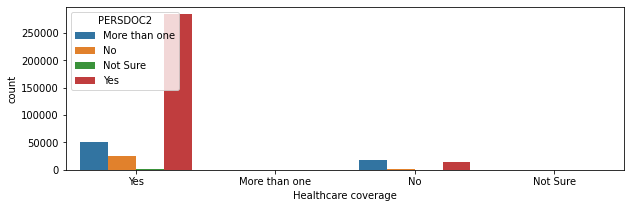

In [87]:
dic2_healthcare =  {1: "Yes",
                   2: "No",
                   3: 'More than one',
                   7: "Not Sure ",
                   9: np.nan}
raw_data["PERSDOC2"] = raw_data["PERSDOC2"].replace(dic2_healthcare).astype('category')

# healthcare cost concern
raw_data['MEDCOST']=raw_data['MEDCOST'].replace(dic_healthcare).astype('category')

plt.figure(figsize=(10,3))
sns.countplot(x = 'HLTHPLN1', data = raw_data, hue='PERSDOC2',order =["Yes",'More than one','No','Not Sure'] )
plt.xlabel('Healthcare coverage')
plt.show()

It is intresting to see that there are some people hat have no healthcare coverage but have personal doctors (why really? that would cost them a fortune to be treated!lol!)

PERSDOC2: Do you have one person you  think of as your  personal doctor  or health care provider?

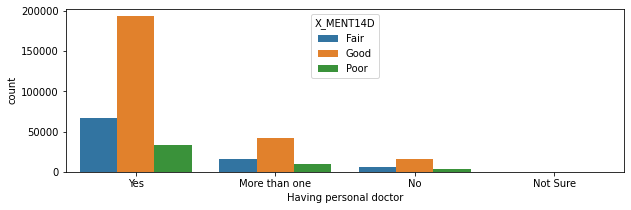

In [86]:
plt.figure(figsize=(10,3))
sns.countplot(x = 'PERSDOC2', data = raw_data, hue=target,order =["Yes",'More than one','No','Not Sure'] )
plt.xlabel('Having personal doctor')
plt.show()


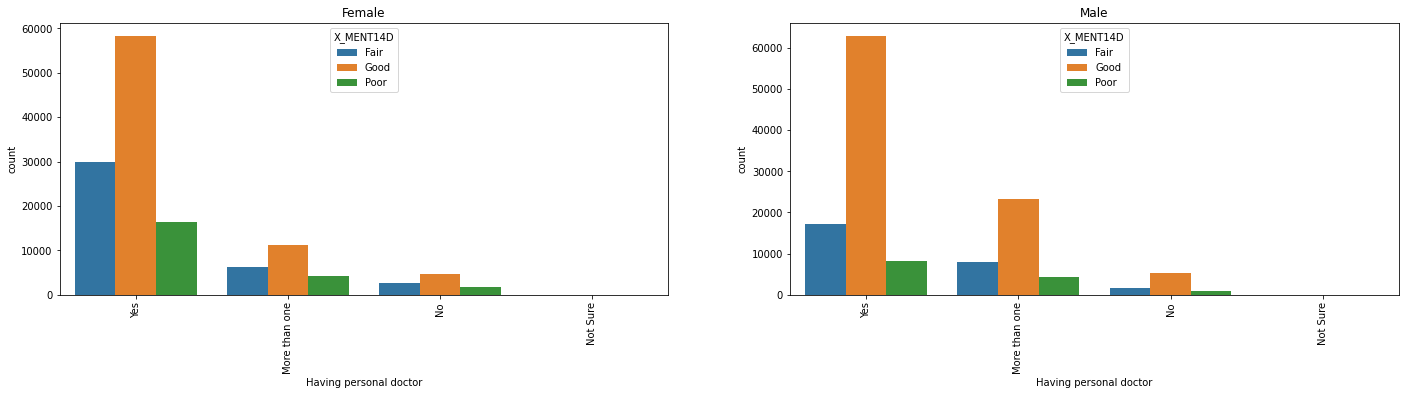

In [79]:
f, axes = plt.subplots(1, 2,figsize=(24, 5))
order  =["Yes",'More than one','No','Not Sure']
sns.countplot( x="PERSDOC2", data=raw_data[raw_data['CELLSEX']=='Female'],hue = target, order = order,ax=axes[0])
sns.countplot( x="PERSDOC2", data=raw_data[raw_data['CELLSEX']=='Male'],hue = target, order = order,ax=axes[1])
axes[0].title.set_text('Female')
axes[1].title.set_text('Male')

axes[0].set_xlabel('Having personal doctor')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=90)

axes[1].set_xlabel('Having personal doctor')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=90)

plt.show()

## Age

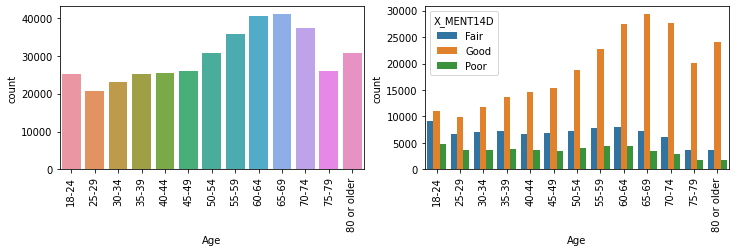

In [85]:
dic_age = {1: '18-24',
           2: '25-29',
           3: '30-34',
           4: '35-39',
           5: '40-44', 
           6: '45-49',
           7: '50-54',
           8: '55-59',
           9: '60-64',
           10:'65-69',
           11:'70-74',
           12:'75-79',
           13:'80 or older',
           14: np.nan }
raw_data['X_AGEG5YR'] = raw_data['X_AGEG5YR'].replace(dic_age).astype('category')
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(x = 'X_AGEG5YR', data = raw_data)
plt.xlabel('Age')
plt.xticks(rotation = 90)

plt.subplot(122)
sns.countplot(x = 'X_AGEG5YR', data = raw_data , hue = target)
plt.xlabel('Age')
plt.xticks(rotation = 90)
plt.show()

## Smoke 

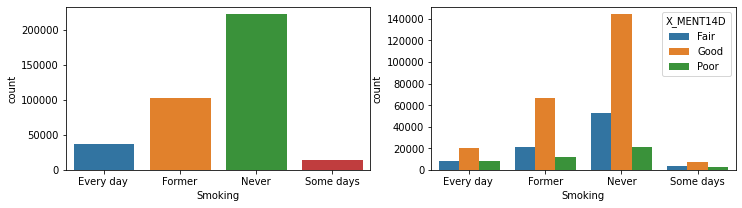

In [81]:
dic_smoke = {1:"Every day ",
             2:"Some days" ,
             3:"Former" ,
             4:'Never',
             7:"Not Sure" ,
             9:np.nan}
raw_data['X_SMOKER3'] = raw_data['X_SMOKER3'].replace(dic_smoke).astype('category')

plt.figure(figsize=(12, 3))
plt.subplot(121)
sns.countplot(raw_data['X_SMOKER3'])
plt.xlabel('Smoking')

plt.subplot(122)
sns.countplot(x='X_SMOKER3', hue = target, data=raw_data)
plt.xlabel('Smoking')
plt.show()

## Marijuana

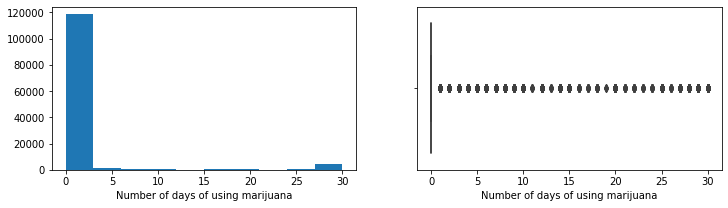

In [84]:
# marijuana usuage days
raw_data['MARIJAN1'] = raw_data['MARIJAN1'].replace(77, np.nan)
raw_data['MARIJAN1'] = raw_data['MARIJAN1'].replace(99, np.nan)
raw_data['MARIJAN1'] = raw_data['MARIJAN1'].replace(88, 0)


# reason for using marijuana
dic_mar = { 1:'medical reasons', 
            2:'non-medical reasons',
            3:'medical/non-medical reasons',
            7:'Not Sure',
            9:np.nan}
raw_data['RSNMRJN1']= raw_data['RSNMRJN1'].replace(dic_mar).astype('category')

plt.figure(figsize=(12,3))
plt.subplot(121)
plt.hist(raw_data['MARIJAN1'])
plt.xlabel('Number of days of using marijuana')

plt.subplot(122)
sns.boxplot(raw_data['MARIJAN1'])
plt.xlabel('Number of days of using marijuana')
plt.show()

## Drink

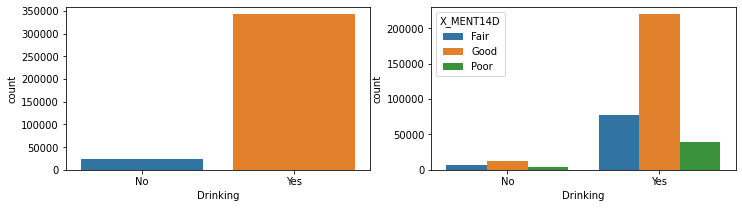

In [83]:
# being drinker
dic_drink = {1: 'Yes',
             2: 'No',
             9: np.nan}

raw_data['X_RFBING5']=raw_data['X_RFBING5'].replace(dic_drink).astype('category')


# heavy drinkers
raw_data['X_RFDRHV7'] = raw_data['X_RFDRHV7'].replace(dic_drink).astype('category')

plt.figure(figsize=(12, 3))
plt.subplot(121)
sns.countplot(raw_data['X_RFDRHV7'])
plt.xlabel('Drinking')

plt.subplot(122)
sns.countplot(x='X_RFDRHV7', hue = target, data=raw_data)
plt.xlabel('Drinking')
plt.show()